### Importing Dependencies

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data collection and Processing

In [30]:
# loading the csv file to pandas dataframe
car_data = pd.read_csv("car_data.csv")

In [31]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
# checking number of rows and columns
car_data.shape

(301, 9)

In [33]:
# checking if thre is any null value ..
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [34]:
# about some information abt the datast
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [35]:
# statstical measurements 
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


##### checking the distribution of categorica; data

In [36]:

# Fuel Type
car_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [37]:
print("Value count of Seller Type ")
car_data['Seller_Type'].value_counts()

Value count of Seller Type 


Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [38]:
print("value count of Trasnmission")
car_data['Transmission'].value_counts()

value count of Trasnmission


Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

### Encoding the categorical Data

In [39]:
# Encoding Fuel_Type Column
car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1 , 'CNG':2}}, inplace=True)

# Encoding Seller_Type Column
car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }}, inplace=True)

# Encoding Transmission Column
car_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

C:\Users\Dips\AppData\Local\Temp\ipykernel_10248\4145983038.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1 , 'CNG':2}}, inplace=True)
C:\Users\Dips\AppData\Local\Temp\ipykernel_10248\4145983038.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }}, inplace=True)
C:\Users\Dips\AppData\Local\Temp\ipykernel_10248\4145983038.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [40]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Spliting the data and Target

In [41]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [42]:
X.head()


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [43]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Spliting the Data into Training and Test

In [44]:
x_train , x_teast , y_train, y_test = train_test_split(X, Y, test_size=0.1,  random_state=2)

#### Model Training

##### 1. Linear Regression Model

In [45]:
linear_regression_model = LinearRegression()

In [46]:
linear_regression_model.fit(x_train, y_train)

LinearRegression()

#### Model Evaluation

In [47]:
# Prdiction on training data
training_predition_data = linear_regression_model.predict(x_train)

In [48]:
# R squared error 
error_score = metrics.r2_score(y_train, training_predition_data)

print(f"The error score prediction {error_score}")

The error score prediction 0.8799451660493699


#### Visualze the actual prices andf prediction prices

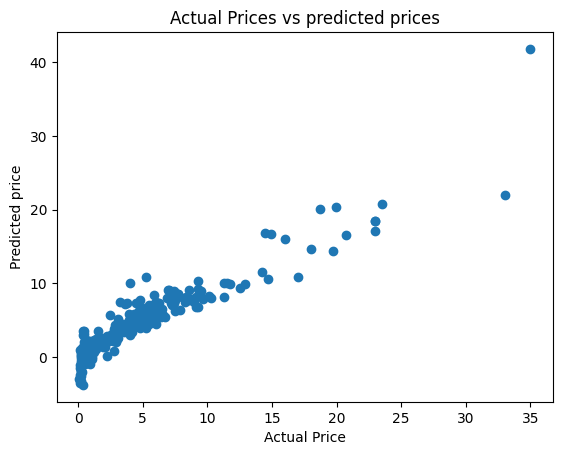

In [49]:
plt.scatter(y_train, training_predition_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs predicted prices")
plt.show()

In [50]:
# Prdiction on Test data
test_predition_data = linear_regression_model.predict(x_teast)

In [51]:
# R squared error 
error_score = metrics.r2_score(y_test, test_predition_data)

print(f"The error score prediction {error_score}")

The error score prediction 0.8365766715026473


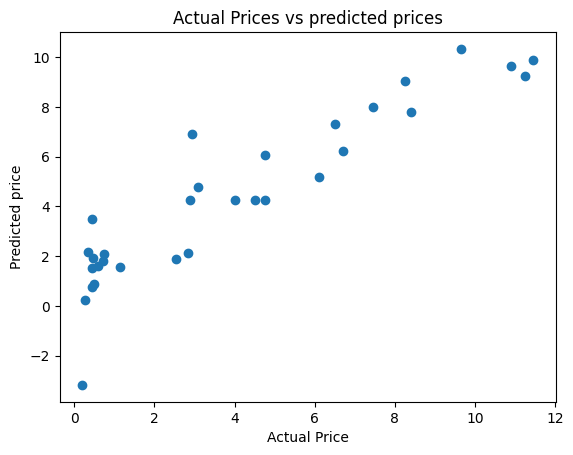

In [52]:
plt.scatter(y_test, test_predition_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs predicted prices")
plt.show()

#### Lasso Regression

In [53]:
lasso_regression_model = Lasso()

In [54]:
lasso_regression_model.fit(x_train, y_train)

Lasso()

In [55]:
training_predition_data_lasso = lasso_regression_model.predict(x_train)

In [56]:
error_score_lasso = metrics.r2_score(y_train, training_predition_data_lasso)

print(f" R squared error {error_score_lasso}")

 R squared error 0.8427856123435795


ValueError: x and y must be the same size

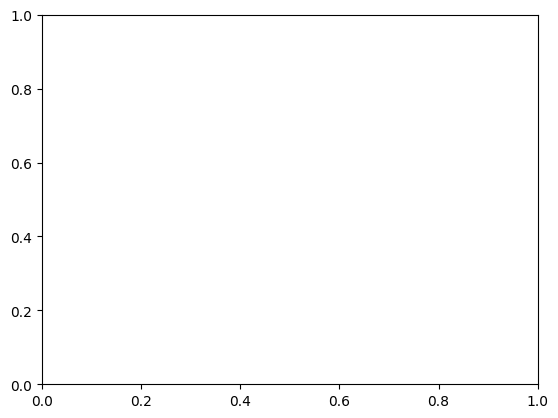

In [57]:
plt.scatter(y_test, training_predition_data_lasso)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs predicted prices")
plt.show()